# Cleaning the Star Wars Data
## *An Example in: Data Cleaning & Wrangling*

![Cleaning Star Wars](../portfolio/Data/star_wars/star_wars_cleaning3.jpg)

Data cleansing is a subprocess of the data science process that focuses on removing errors in your data, so your data becomes a true and consistent representation of the processes it originates from. The entire process of cleaning, transforming and combining data is often said to represent 80% of data science projects.

I will be demonstrating the most basic and common task in this minor project. More advanced features will not be explained in this project, such as:
* detecting and handling outliers, 
* in-depth solutions for missing data (like multiple imputations) 
* ensuring dates are correct and homogeneous.

--------------------------


## *Table of Contents*
* [1. Introduction](#1)
* [2. Importing the Data](#2)
* [3. Exploring the Columns and Rows](#3)
* [4. Renaming the Columns](#4)
* [5. Removing Missing Data](#5)
* [6. Mapping Values](#6)
* [7. Change Columns Type](#7)
* [8. Descriptive Statistics](#8)


## <a name="1"></a> 1. Introduction

While waiting for [Star Wars: The Force Awakens](https://en.wikipedia.org/wiki/Star_Wars:_The_Force_Awakens) to come out, the team at [FiveThirtyEight](https://fivethirtyeight.com/) became interested in answering some questions about Star Wars fans. In particular, they wondered: **does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?**

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which you can explore for yourself from [their GitHub repository.](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey)

In this project, I will provide an example of cleaning and slightly analyzing the data on the Star Wars movies.


## <a name="2"></a> 2. Importing the Data

We will be using the ***Pandas*** library as the main tool for getting familiarized and tidying the data. Fortunately, the Pandas library also provides excellent data importing options with various essential parameters (e.g. the type of encoding). The following code will read the data from a __*"Comma-separated values"*__ (CSV) file into a pandas dataframe:

In [1]:
import pandas as pd
star_wars = pd.read_csv("Data/star_wars/star_wars.csv", encoding="ISO-8859-1")

We need to specify an ***encoding*** because the data set has some characters that aren't in Python's default ***utf-8*** encoding.


## <a name="3"></a> 3. Exploring the Columns and Rows

As we now have all the data in the ***star_wars*** dataframe, let’s begin to explore the data by first getting an overview of the column names, and the number of columns and rows. We will obtain this information by using the ***info*** function in the Pandas library.

Furthermore, we will also be using the ***head*** and ***tail*** function to get some insight about the first 5 and last 5 rows in the dataframe.

In [2]:
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187 entries, 0 to 1186
Data columns (total 38 columns):
RespondentID                                                                                                                                     1186 non-null float64
Have you seen any of the 6 films in the Star Wars franchise?                                                                                     1187 non-null object
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                            837 non-null object
Which of the following Star Wars films have you seen? Please select all that apply.                                                              674 non-null object
Unnamed: 4                                                                                                                                       572 non-null object
Unnamed: 5                                                       

In [3]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe???,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [4]:
star_wars.tail()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe???,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1182,3.288389e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,Han,No,NaN,Yes,Female,18-29,"$0 - $24,999",Some college or Associate degree,East North Central
1183,3.288379e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,I don't understand this question,No,NaN,Yes,Female,30-44,"$50,000 - $99,999",Bachelor degree,Mountain
1184,3.288375e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,No,Female,30-44,"$50,000 - $99,999",Bachelor degree,Middle Atlantic
1185,3.288373e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Female,45-60,"$100,000 - $149,999",Some college or Associate degree,East North Central
1186,3.288373e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,NaN,NaN,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very unfavorably,I don't understand this question,No,NaN,No,Female,> 60,"$50,000 - $99,999",Graduate degree,Pacific


The ***info*** function in combination with ***head*** and ***tail*** are incredibly useful as it has now provided us with the following information:
 * There are **38 columns**
 * There are **1187 rows** (including header)
 * There is only 1 ***float*** (ID column) and the remaining columns are the ***object*** type
 * There is various amount of missing values in each column
 * The naming of the columns is messy with many **Unnamed** columns and a few very long column names
 
Based on this exploration we will need to investigate the naming of the columns and the missing values. We will start off by digging into the renaming part, so it will be more intuitive to work with the dataframe.



## <a name="4"></a> 4. Renaming the Columns

In order to rename the columns, we will need to know specifically what each column represents. The ***head*** and ***tail*** function provided some insight to this. 

The data has several columns, including:

* **_RespondentID_** - An anonymized ID for the respondent (person taking the survey)
* **_Gender_** - The respondent's gender
* **_Age_** - The respondent's age
* **_Household Income_** - The respondent's income
* **_Education_** - The respondent's education level
* **_Location (Census Region)_** - The respondent's location
* **_Do you consider yourself to be a fan of the Star Wars film franchise?_** - Has a Yes or No response
* **_Have you seen any of the 6 films in the Star Wars franchise?_** - Has a Yes or No response

There are several other columns containing answers to questions about the Star Wars movies. For some questions, the respondent had to check one or more boxes. This type of data is difficult to represent in columnar format. As a result, many of the columns have been named **unnamed**.

The unnamed columns are basicaly an extension of the question that proceeded a sequence of unnamed columns. To clarify, I will illustrate the first sequence of unnamed columns: 

* **_Which of the following Star Wars films have you seen? Please select all that apply._** - Whether or not the respondent saw _Star Wars: Episode I The Phantom Menace_.
* **_Unnamed: 4_** - Whether or not the respondent saw _Star Wars: Episode II Attack of the Clones_.
* **_Unnamed: 5_** - Whether or not the respondent saw _Star Wars: Episode III Revenge of the Sith_.
* **_Unnamed: 6_** - Whether or not the respondent saw _Star Wars: Episode IV A New Hope_.
* **_Unnamed: 7_** - Whether or not the respondent saw _Star Wars: Episode V The Empire Strikes Back_.
* **_Unnamed: 8_** - Whether or not the respondent saw _Star Wars: Episode VI Return of the Jedi_.

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is `NaN`, the respondent either didn't answer or didn't see the movie. We'll assume that they didn't see the movie.

### 4.1 Renaming Unnamed 4-8 Columns
We will start off by renaming these columns to a more understandable naming. We will do this by creating a dictionary which will contain the translation of the new column names. Afterwards we will feed the ***rename*** method with the dictionary.

In [5]:
new_names={
    'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1',
    'Unnamed: 4': 'seen_2',
    'Unnamed: 5': 'seen_3',
    'Unnamed: 6': 'seen_4',
    'Unnamed: 7': 'seen_5',
    'Unnamed: 8': 'seen_6'}

star_wars = star_wars.rename(columns=new_names)
star_wars.iloc[0:5,0:9]

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi


### 4.2 Renaming Unnamed 10-14 and 16-28 Columns
The sequence of unnamed 4-8 have successfully been renamed to **seen_x**. We will now do this for the remaining unnamed columns. 

In [6]:
star_wars.iloc[0:5,9:15]

,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
1,3,2,1,4,5,6
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2,3,4,5,6
4,5,6,1,2,4,3


In [7]:
new_names={
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'rank_1',
    'Unnamed: 10': 'rank_2',
    'Unnamed: 11': 'rank_3',
    'Unnamed: 12': 'rank_4',
    'Unnamed: 13': 'rank_5',
    'Unnamed: 14': 'rank_6'}

star_wars = star_wars.rename(columns=new_names)
star_wars.iloc[0:5,9:15]

,rank_1,rank_2,rank_3,rank_4,rank_5,rank_6
0,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
1,3,2,1,4,5,6
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2,3,4,5,6
4,5,6,1,2,4,3


In [10]:
star_wars.iloc[0:5,15:29]

,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda
0,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda
1,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A)
4,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably


In [8]:
new_names={
    'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.': 'Han Solo',
    'Unnamed: 16': 'Luke Skywalker',
    'Unnamed: 17': 'Princess Leia Organa',
    'Unnamed: 18': 'Anakin Skywalker',
    'Unnamed: 19': 'Obi Wan Kenobi',
    'Unnamed: 20': 'Emperor Palpatine',
    'Unnamed: 21': 'Darth Vader',
    'Unnamed: 22': 'Lando Calrissian',
    'Unnamed: 23': 'Boba Fett',
    'Unnamed: 24': 'C-3P0',
    'Unnamed: 25': 'R2 D2',
    'Unnamed: 26': 'Jar Jar Binks',
    'Unnamed: 27': 'Padme Amidala',
    'Unnamed: 28': 'Yoda'}

star_wars = star_wars.rename(columns=new_names)
star_wars.iloc[0:5,15:29]

,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda
0,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda
1,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A)
4,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably


### 4.3 Inspecting the Renamed Columns
Now that we have renamed all the unnamed columns, lets get an overview of all the names in a list format.

In [9]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6', 'rank_1',
       'rank_2', 'rank_3', 'rank_4', 'rank_5', 'rank_6', 'Han Solo',
       'Luke Skywalker', 'Princess Leia Organa', 'Anakin Skywalker',
       'Obi Wan Kenobi', 'Emperor Palpatine', 'Darth Vader',
       'Lando Calrissian', 'Boba Fett', 'C-3P0', 'R2 D2', 'Jar Jar Binks',
       'Padme Amidala', 'Yoda', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe???',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 'Education',
       'Location (Census Region)'],
      dtype='object')

## <a name="5"></a> 5. Removing Missing Data

The columns have now been renamed to a naming which is more intuitive to understand. Now we will explore the amount of missing data. We can do this by using the ***isnull*** in combination with the ***sum*** methods.

In [11]:
star_wars.isnull().sum()

RespondentID                                                               1
Have you seen any of the 6 films in the Star Wars franchise?               0
Do you consider yourself to be a fan of the Star Wars film franchise?    350
seen_1                                                                   513
seen_2                                                                   615
seen_3                                                                   636
seen_4                                                                   579
seen_5                                                                   428
seen_6                                                                   448
rank_1                                                                   351
rank_2                                                                   350
rank_3                                                                   351
rank_4                                                                   350

From this initial inspection, it could seem that there is an unreasonably high amount of missing data. However, we will soon see that this may not be the case for most columns in the dataframe. We will get into this in the next section.

Before we move on, we will need to remove the row with a missing value in the respondentID column.

In [12]:
star_wars = star_wars[pd.notnull(star_wars['RespondentID'])]
star_wars['RespondentID'].isnull().sum()

0

## <a name="6"></a> 6. Mapping Values

In the previous section we observed a high number of missing values across all columns. But when we begin to investigate this pattern we will see a quite another explanation for the missing values.

In [13]:
star_wars.iloc[0:5,0:9]

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi


### 6.1 Mapping Yes/No Columns

Take a look at the next two columns after RespondentID, which are:

* ___Have you seen any of the 6 films in the Star Wars franchise?___
* ___Do you consider yourself to be a fan of the Star Wars film franchise?___

Both represent _Yes/No_ questions. They can also be _NaN_ where a respondent chooses not to answer a question. We can use the *pandas.Series.value\_counts()* method on a series to see all the unique values in a column, along with the total number of times each value appears.

In [16]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [17]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts()

Yes    552
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

Both columns are currently __string types__, because the main values they contain are _Yes_ and _No_. We can make the data a bit easier to analyze down the road by converting each column to a _Boolean_ having only the values True, False, and NaN. Booleans are easier to work with because we can select the rows that are True or False without having to do a string comparison.

We can use the __pandas.Series.map()__ method on series objects to perform the conversion.

As we can see in the first 5 rows of the dataframe, missing values may indicate the answer "no" whereas the name of the star wars movie represents the answer "yes". For the purpose of this project we will assume the missing values in these columns indeed represents the answer "no".

In [18]:
yes_no = {
    "Yes": True,
    "No": False
}
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [19]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts()

True     552
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

We can see the value_counts demonstrated that the 2 columns have indeed been converted to boolean. I will continue to do the same for the 3 remaning yes/no columns in the dataframe.

In [20]:
star_wars['Are you familiar with the Expanded Universe?'] = star_wars['Are you familiar with the Expanded Universe?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Expanded Universe???'] = star_wars['Do you consider yourself to be a fan of the Expanded Universe???'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Trek franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Trek franchise?'].map(yes_no)

### 6.2 Mapping Checkbox Columns

The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question, ***Which of the following Star Wars films have you seen? Please select all that apply***.

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is ***NaN***, the respondent either didn't answer or didn't see the movie. We'll assume that they didn't see the movie.

We'll need to convert each of these columns to a ***Boolean***. We can convert the values the same way we did earlier, except that we'll need to include the movie title and NaN in the mapping dictionary.

In [21]:
import numpy as np
true_false = {
    np.NaN: False,
    "Star Wars: Episode I  The Phantom Menace": True,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True
}

for i in range(3,9):
    star_wars.iloc[:,i] = star_wars.iloc[:,i].map(true_false)
    
star_wars.iloc[0:5,0:9]

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
1,3.292880e+09,True,True,True,True,True,True,True,True
2,3.292880e+09,False,NaN,False,False,False,False,False,False
3,3.292765e+09,True,False,True,True,True,False,False,False
4,3.292763e+09,True,True,True,True,True,True,True,True
5,3.292731e+09,True,True,True,True,True,True,True,True


All the "seen" columns have successfully been mapped to boolean type.



## <a name="7"></a> 7. Change Columns Type

The next six columns ask the respondent to rank the Star Wars movies in order of least favorite to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite. Each of the following columns can contain the value **1, 2, 3, 4, 5, 6** or **NaN**:

* **rank_1** - How much the respondent liked *Star Wars: Episode I The Phantom Menace*
* **rank_2** - How much the respondent liked *Star Wars: Episode II Attack of the Clones*
* **rank_3** - How much the respondent liked *Star Wars: Episode III Revenge of the Sith*
* **rank_4** - How much the respondent liked *Star Wars: Episode IV A New Hope*
* **rank_5** - How much the respondent liked *Star Wars: Episode V The Empire Strikes Back*
* **rank_6** - How much the respondent liked *Star Wars: Episode VI Return of the Jedi*

Fortunately, these columns don't require a lot of cleanup. We'll need to convert each column to a ***numeric type***.

We can do the numeric conversion with the ***pandas.DataFrame.astype()*** method on dataframes. 

In [25]:
star_wars.iloc[:,9:15].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1186 entries, 1 to 1186
Data columns (total 6 columns):
rank_1    835 non-null float64
rank_2    836 non-null float64
rank_3    835 non-null float64
rank_4    836 non-null float64
rank_5    836 non-null float64
rank_6    836 non-null float64
dtypes: float64(6)
memory usage: 64.9 KB


In [24]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [22]:
star_wars.iloc[:,9:15].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1186 entries, 1 to 1186
Data columns (total 6 columns):
rank_1    835 non-null object
rank_2    836 non-null object
rank_3    835 non-null object
rank_4    836 non-null object
rank_5    836 non-null object
rank_6    836 non-null object
dtypes: object(6)
memory usage: 64.9+ KB


## <a name="8"></a> 8. Descriptive Statistics

Now that the dataframe has been cleaned up, we can perform a few descriptive statistics. Let’s find the highest-ranked movie. To do this, we will take the mean of each of the ranking columns using the ***pandas.DataFrame.mean()*** method on dataframes.

In [23]:
star_wars.iloc[:,9:15].mean()

Series([], dtype: float64)

Based on the mean values it may seem the best ranking star wars movie among the responders is ***"Star Wars: Episode V The Empire Strikes Back"*** and the least ranked is the ***"Star Wars: Episode III Revenge of the Sith"*** (remember lower score is better ranking).

Now let’s make a bar chart to display this difference more visually.

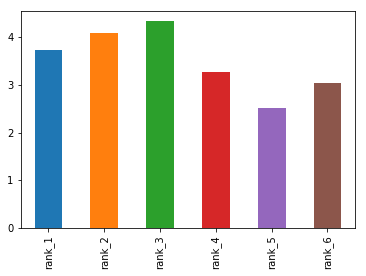

In [26]:
%matplotlib inline
mean_ranking = star_wars.iloc[:,9:15].mean()
mean_ranking.plot.bar()